In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import os
import sys
sys.path.insert(0, '/media/allen/mass/deep-learning-works/')
from data import data_manager
from data.build_data import build_par_dataset
from data.build_transform import build_transform
from model.managers.manager_par import PARManager
from config.config_manager import _C as cfg
from tools.logger import setup_logger

In [1]:
logger = setup_logger(".")
cfg.merge_from_file("../par.yml")
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/PAR"
cfg.EVALUATE = "/home/allen/OSNet_par_bces_SGD_lr_0.01_warmup_10_0.01_plateau_10_flip_crop_imagenet_0.8981.pth"

In [2]:
dataset = get_img_data(cfg)
trans = build_transform(cfg, isTrain=False)
vdata = build_par_dataset(dataset.val, trans)

2019-08-27 14:48:47,035 logger INFO: => PAR loaded
2019-08-27 14:48:47,036 logger INFO: Dataset statistics:
2019-08-27 14:48:47,036 logger INFO:   ------------------------------
2019-08-27 14:48:47,037 logger INFO:   subset   | # class | # images
2019-08-27 14:48:47,037 logger INFO:   ------------------------------
2019-08-27 14:48:47,038 logger INFO:   train    |      13 |   185887
2019-08-27 14:48:47,039 logger INFO:   val      |      13 |    94335
2019-08-27 14:48:47,039 logger INFO:   ------------------------------


In [9]:
manager = PARManager(cfg)
core = manager.model

2019-08-27 14:52:56,616 logger INFO: Evaluating model from /home/allen/OSNet_par_bces_SGD_lr_0.01_warmup_10_0.01_plateau_10_flip_crop_imagenet_0.8981.pth
2019-08-27 14:52:56,665 logger INFO: opt_0 is skipped
2019-08-27 14:52:56,669 logger INFO: backbone.conv1.conv.weight                                   ...... loaded
2019-08-27 14:52:56,670 logger INFO: backbone.conv1.bn.weight                                     ...... loaded
2019-08-27 14:52:56,671 logger INFO: backbone.conv1.bn.bias                                       ...... loaded
2019-08-27 14:52:56,672 logger INFO: backbone.conv1.bn.running_mean                               ...... loaded
2019-08-27 14:52:56,673 logger INFO: backbone.conv1.bn.running_var                                ...... loaded
2019-08-27 14:52:56,674 logger INFO: backbone.conv1.bn.num_batches_tracked                        ...... loaded
2019-08-27 14:52:56,675 logger INFO: backbone.conv2.0.conv1.conv.weight                           ...... loaded
2019-08-

2019-08-27 14:52:56,746 logger INFO: backbone.conv2.0.conv2d.2.bn.running_mean                    ...... loaded
2019-08-27 14:52:56,747 logger INFO: backbone.conv2.0.conv2d.2.bn.running_var                     ...... loaded
2019-08-27 14:52:56,748 logger INFO: backbone.conv2.0.conv2d.2.bn.num_batches_tracked             ...... loaded
2019-08-27 14:52:56,749 logger INFO: backbone.conv2.0.conv2d.3.conv1.weight                       ...... loaded
2019-08-27 14:52:56,750 logger INFO: backbone.conv2.0.conv2d.3.conv2.weight                       ...... loaded
2019-08-27 14:52:56,751 logger INFO: backbone.conv2.0.conv2d.3.bn.weight                          ...... loaded
2019-08-27 14:52:56,752 logger INFO: backbone.conv2.0.conv2d.3.bn.bias                            ...... loaded
2019-08-27 14:52:56,753 logger INFO: backbone.conv2.0.conv2d.3.bn.running_mean                    ...... loaded
2019-08-27 14:52:56,754 logger INFO: backbone.conv2.0.conv2d.3.bn.running_var                     ......

2019-08-27 14:52:56,826 logger INFO: backbone.conv2.1.conv2d.0.conv1.weight                       ...... loaded
2019-08-27 14:52:56,828 logger INFO: backbone.conv2.1.conv2d.0.conv2.weight                       ...... loaded
2019-08-27 14:52:56,830 logger INFO: backbone.conv2.1.conv2d.0.bn.weight                          ...... loaded
2019-08-27 14:52:56,831 logger INFO: backbone.conv2.1.conv2d.0.bn.bias                            ...... loaded
2019-08-27 14:52:56,833 logger INFO: backbone.conv2.1.conv2d.0.bn.running_mean                    ...... loaded
2019-08-27 14:52:56,834 logger INFO: backbone.conv2.1.conv2d.0.bn.running_var                     ...... loaded
2019-08-27 14:52:56,835 logger INFO: backbone.conv2.1.conv2d.0.bn.num_batches_tracked             ...... loaded
2019-08-27 14:52:56,836 logger INFO: backbone.conv2.1.conv2d.1.conv1.weight                       ...... loaded
2019-08-27 14:52:56,837 logger INFO: backbone.conv2.1.conv2d.1.conv2.weight                       ......

2019-08-27 14:52:56,926 logger INFO: backbone.conv3.0.conv2c.0.bn.bias                            ...... loaded
2019-08-27 14:52:56,927 logger INFO: backbone.conv3.0.conv2c.0.bn.running_mean                    ...... loaded
2019-08-27 14:52:56,928 logger INFO: backbone.conv3.0.conv2c.0.bn.running_var                     ...... loaded
2019-08-27 14:52:56,929 logger INFO: backbone.conv3.0.conv2c.0.bn.num_batches_tracked             ...... loaded
2019-08-27 14:52:56,931 logger INFO: backbone.conv3.0.conv2c.1.conv1.weight                       ...... loaded
2019-08-27 14:52:56,933 logger INFO: backbone.conv3.0.conv2c.1.conv2.weight                       ...... loaded
2019-08-27 14:52:56,934 logger INFO: backbone.conv3.0.conv2c.1.bn.weight                          ...... loaded
2019-08-27 14:52:56,936 logger INFO: backbone.conv3.0.conv2c.1.bn.bias                            ...... loaded
2019-08-27 14:52:56,938 logger INFO: backbone.conv3.0.conv2c.1.bn.running_mean                    ......

2019-08-27 14:52:57,005 logger INFO: backbone.conv3.1.conv2a.bn.num_batches_tracked               ...... loaded
2019-08-27 14:52:57,006 logger INFO: backbone.conv3.1.conv2b.0.conv1.weight                       ...... loaded
2019-08-27 14:52:57,007 logger INFO: backbone.conv3.1.conv2b.0.conv2.weight                       ...... loaded
2019-08-27 14:52:57,008 logger INFO: backbone.conv3.1.conv2b.0.bn.weight                          ...... loaded
2019-08-27 14:52:57,009 logger INFO: backbone.conv3.1.conv2b.0.bn.bias                            ...... loaded
2019-08-27 14:52:57,010 logger INFO: backbone.conv3.1.conv2b.0.bn.running_mean                    ...... loaded
2019-08-27 14:52:57,011 logger INFO: backbone.conv3.1.conv2b.0.bn.running_var                     ...... loaded
2019-08-27 14:52:57,012 logger INFO: backbone.conv3.1.conv2b.0.bn.num_batches_tracked             ...... loaded
2019-08-27 14:52:57,013 logger INFO: backbone.conv3.1.conv2b.1.conv1.weight                       ......

2019-08-27 14:52:57,082 logger INFO: backbone.conv3.2.0.conv.weight                               ...... loaded
2019-08-27 14:52:57,083 logger INFO: backbone.conv3.2.0.bn.weight                                 ...... loaded
2019-08-27 14:52:57,083 logger INFO: backbone.conv3.2.0.bn.bias                                   ...... loaded
2019-08-27 14:52:57,084 logger INFO: backbone.conv3.2.0.bn.running_mean                           ...... loaded
2019-08-27 14:52:57,085 logger INFO: backbone.conv3.2.0.bn.running_var                            ...... loaded
2019-08-27 14:52:57,086 logger INFO: backbone.conv3.2.0.bn.num_batches_tracked                    ...... loaded
2019-08-27 14:52:57,086 logger INFO: backbone.conv4.0.conv1.conv.weight                           ...... loaded
2019-08-27 14:52:57,087 logger INFO: backbone.conv4.0.conv1.bn.weight                             ...... loaded
2019-08-27 14:52:57,088 logger INFO: backbone.conv4.0.conv1.bn.bias                               ......

2019-08-27 14:52:57,153 logger INFO: backbone.conv4.0.conv2d.2.bn.num_batches_tracked             ...... loaded
2019-08-27 14:52:57,154 logger INFO: backbone.conv4.0.conv2d.3.conv1.weight                       ...... loaded
2019-08-27 14:52:57,155 logger INFO: backbone.conv4.0.conv2d.3.conv2.weight                       ...... loaded
2019-08-27 14:52:57,156 logger INFO: backbone.conv4.0.conv2d.3.bn.weight                          ...... loaded
2019-08-27 14:52:57,157 logger INFO: backbone.conv4.0.conv2d.3.bn.bias                            ...... loaded
2019-08-27 14:52:57,158 logger INFO: backbone.conv4.0.conv2d.3.bn.running_mean                    ...... loaded
2019-08-27 14:52:57,159 logger INFO: backbone.conv4.0.conv2d.3.bn.running_var                     ...... loaded
2019-08-27 14:52:57,160 logger INFO: backbone.conv4.0.conv2d.3.bn.num_batches_tracked             ...... loaded
2019-08-27 14:52:57,161 logger INFO: backbone.conv4.0.gate.fc1.weight                             ......

2019-08-27 14:52:57,223 logger INFO: backbone.conv4.1.conv2d.0.bn.weight                          ...... loaded
2019-08-27 14:52:57,225 logger INFO: backbone.conv4.1.conv2d.0.bn.bias                            ...... loaded
2019-08-27 14:52:57,226 logger INFO: backbone.conv4.1.conv2d.0.bn.running_mean                    ...... loaded
2019-08-27 14:52:57,227 logger INFO: backbone.conv4.1.conv2d.0.bn.running_var                     ...... loaded
2019-08-27 14:52:57,228 logger INFO: backbone.conv4.1.conv2d.0.bn.num_batches_tracked             ...... loaded
2019-08-27 14:52:57,229 logger INFO: backbone.conv4.1.conv2d.1.conv1.weight                       ...... loaded
2019-08-27 14:52:57,231 logger INFO: backbone.conv4.1.conv2d.1.conv2.weight                       ...... loaded
2019-08-27 14:52:57,232 logger INFO: backbone.conv4.1.conv2d.1.bn.weight                          ...... loaded
2019-08-27 14:52:57,234 logger INFO: backbone.conv4.1.conv2d.1.bn.bias                            ......

Populating the interactive namespace from numpy and matplotlib


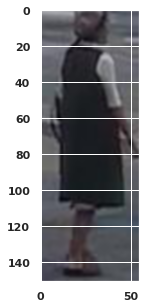

In [68]:
%pylab inline
idx = 10033
path, target = dataset.val[idx]
img_pil = Image.open(path)
fig=plt.figure(figsize=(5,5))
fig.add_subplot(1, 1, 1)
plt.imshow(img_pil, interpolation='bicubic')

In [69]:
with torch.no_grad():
    core.cuda()
    core.eval()
    img_tensor, _ = vdata[idx]
    img_tensor = img_tensor.cuda()
    output = core(img_tensor.unsqueeze(0))    

prob = torch.sigmoid(output).cpu().numpy().squeeze()

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


[0, -1, -1, 1, -1, 1, 0, 0, 1, 1, 0, 0, -1]

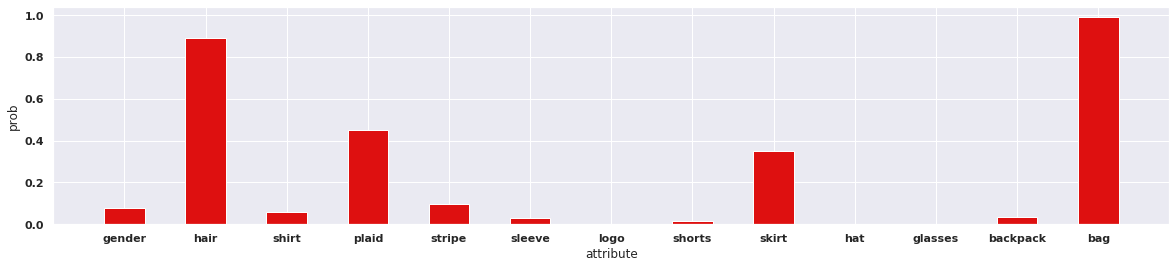

In [70]:
%pylab
import seaborn as sns
plt.figure(figsize=(20,4))
sns.set()

# y-axis in bold
rc('font', weight='bold') 
 
# The position of the bars on the x-axis
r = range(len(manager.category_names))

names = manager.category_names
barWidth = 0.5
 
# Create brown bars
plt.bar(r, prob, color='#de1010', edgecolor='white', width=barWidth, label="N/A")
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("attribute")
plt.ylabel("prob")
# Show graphic
plt.show()
target

In [ ]:
import scikit